# Task 2
Suponiendo que es simple generar variables aleatorias con función de probabilidad acumulada Fi(x) para i de 1 a n, tenemos la variable aleatoria V con una función de probabilidad acumulada:

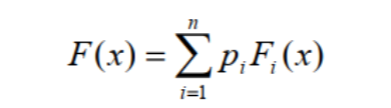

Donde pi constituye una distribución probabilística
1. Describa un algoritmo para generar V
2. Demuestre que el algoritmo genera adecuadamente V

### Algoritmo para generar \( $V$ \):

1. **Entradas**:
   - **Distribuciones acumuladas**: Conjunto de funciones de distribución acumulada \( $F_i(x)$ \), como una función que genera valores uniformes, otra que genera valores según una distribución normal, etc.
   - **Probabilidades**: Conunto de probabilidades \( $p_i$ \) asociadas a cada una de estas distribuciones. Estas probabilidades suman 1.

2. **Proceso**:
   - Genera un número aleatorio \( $U$ \) entre 0 y 1.
   - Usa \( $U$ \) para decidir cuál de las distribuciones \( $F_i(x)$ \) vas a usar. Se suman las probabilidades \( $p_i$ \) hasta que encuentres la que corresponde a \( $U$ \).
   - Una vez decidida la distribución a usar, genera un valor usando esa distribución.

3. **Salida**:
   - Variable aleatoria \( $V$ \).



Probabilidades originales:  [0.2, 0.5, 0.3]
Proporciones empíricas:     [0.1999, 0.5054, 0.2947]


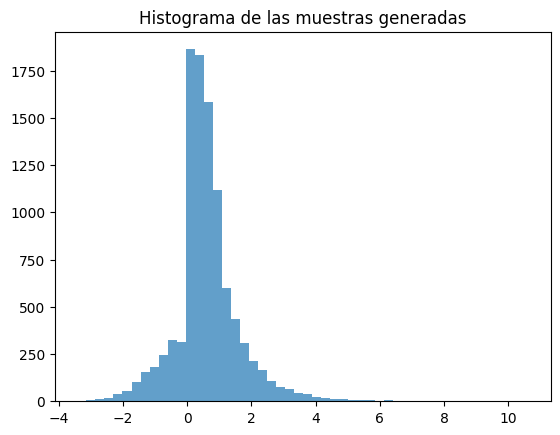

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Algoritmo para generar V
def generar_V(F_list, p_list):
    U = np.random.uniform(0, 1)
    suma_acumulada = 0
    j = 0
    
    for i, p in enumerate(p_list):
        suma_acumulada += p
        if U <= suma_acumulada:
            j = i
            break
    
    V = F_list[j]()
    return V, j

# Funciones de distribución acumulada
def F1():
    return np.random.uniform(0, 1)

def F2():
    return np.random.exponential(1)

def F3():
    return np.random.normal(0, 1)

# Probabilidades p1, p2, p3
p_list = [0.2, 0.5, 0.3]

# Lista de funciones de distribución acumulada
F_list = [F1, F2, F3]

# Generar muestras para verificar la distribución empírica
n_muestras = 10000
muestras = []
frecuencia = [0] * len(p_list)

for _ in range(n_muestras):
    V, j = generar_V(F_list, p_list)
    muestras.append(V)
    frecuencia[j] += 1

# Convertir frecuencias en proporciones
proporciones = [f / n_muestras for f in frecuencia]

# Mostrar las proporciones comparadas
print("Probabilidades originales: ", p_list)
print("Proporciones empíricas:    ", proporciones)

# Graficar los histogramas de las distribuciones generadas
plt.hist([generar_V(F_list, p_list)[0] for _ in range(n_muestras)], bins=50, alpha=0.7)
plt.title('Histograma de las muestras generadas')
plt.show()


Dado que las proporciones empíricas están muy cerca de las probabilidades originales y el histograma tiene la forma esperada, podemos concluir que el algoritmo está funcionando correctamente.